<a href="https://www.kaggle.com/code/mayarmohamedswilam/twitch-watch-time-details?scriptVersionId=141494151" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/first-practise/Twitch_user_data.csv


**load and Explore the Dataset**

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/first-practise/Twitch_user_data.csv')

In [3]:
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


**Exploratory Data Analysis (EDA)**

In [4]:
data.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


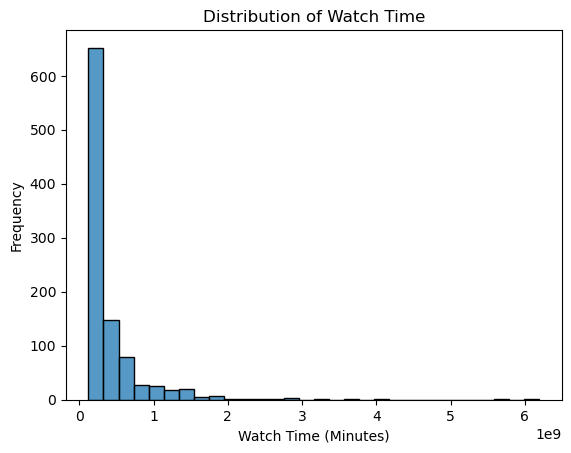

In [5]:
# Distribution of watch time
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Watch time(Minutes)'], bins=30)
plt.xlabel('Watch Time (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Watch Time')
plt.show()

**Formulate Questions**

What is the average and median watch time for users?
**************
Who are the top users in terms of watch time?
**************

In [6]:
average_watch_time = data['Watch time(Minutes)'].mean()
median_watch_time = data['Watch time(Minutes)'].median()

print("Average Watch Time:", average_watch_time)
print("Median Watch Time:", median_watch_time)

Average Watch Time: 418427930.13
Median Watch Time: 234990787.5


In [7]:
top_users = data.nlargest(10, 'Watch time(Minutes)')
print(top_users[['Followers', 'Watch time(Minutes)']])

   Followers  Watch time(Minutes)
0    3246298           6196161750
1    5310163           6091677300
2    1767635           5644590915
3    3944850           3970318140
4    8938903           3671000070
5    1563438           3668799075
6    4074287           3360675195
7     508816           3301867485
8    3530767           2928356940
9    2607076           2865429915


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
print(data.columns)


Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')


1. Which channel has the highest total watch time (minutes)?

2. Which channel has the highest peak viewership?

3. Is there a relationship between stream time and average viewership?

4. Which channels have the most followers gained?

5. Do partnered channels tend to have higher average viewers compared to non-partnered channels?

6. Is there a correlation between mature content and peak viewership?

7. How does language choice impact average viewership?

8. Which channels have the highest followers to views gained ratio?

9. Do channels with more followers tend to have higher watch time?

10. What is the distribution of partnered vs. non-partnered channels?

In [10]:
highest_watch_time_channel = data.loc[data['Watch time(Minutes)'].idxmax()]['Channel']
print("Channel with the highest total watch time:", highest_watch_time_channel)

Channel with the highest total watch time: xQcOW


In [11]:
highest_peak_viewership_channel = data.loc[data['Peak viewers'].idxmax()]['Channel']
print("Channel with the highest peak viewership:", highest_peak_viewership_channel)

Channel with the highest peak viewership: Riot Games (riotgames)


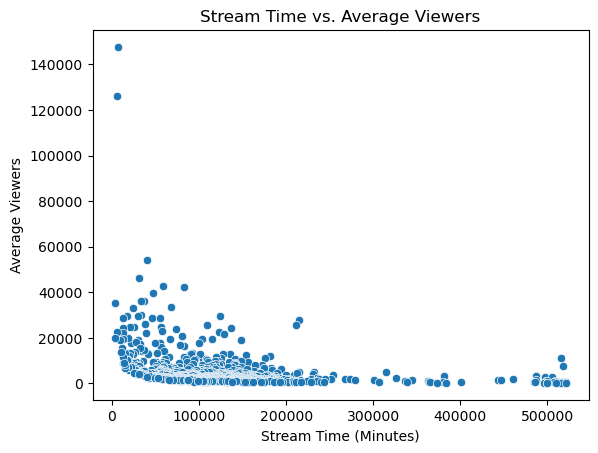

In [12]:
sns.scatterplot(data=data, x='Stream time(minutes)', y='Average viewers')
plt.xlabel('Stream Time (Minutes)')
plt.ylabel('Average Viewers')
plt.title('Stream Time vs. Average Viewers')
plt.show()

In [13]:
top_followers_gained = data.nlargest(10, 'Followers gained')
print("Channels with the most followers gained:")
print(top_followers_gained[['Channel', 'Followers gained']])

Channels with the most followers gained:
       Channel  Followers gained
14   auronplay           3966525
13      Rubius           3820532
25    TheGrefg           3593081
51       Bugha           2220765
90    pokimane           2085831
4         Tfue           2068424
40       Fresh           1875187
669   SLAKUN10           1874846
0        xQcOW           1734810
54        Clix           1687923


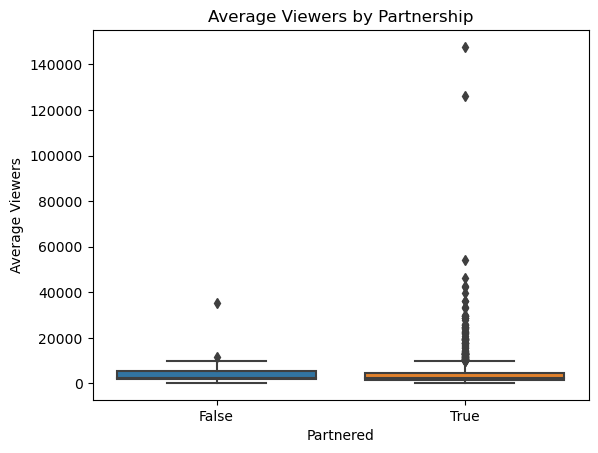

In [14]:
sns.boxplot(data=data, x='Partnered', y='Average viewers')
plt.xlabel('Partnered')
plt.ylabel('Average Viewers')
plt.title('Average Viewers by Partnership')
plt.show()

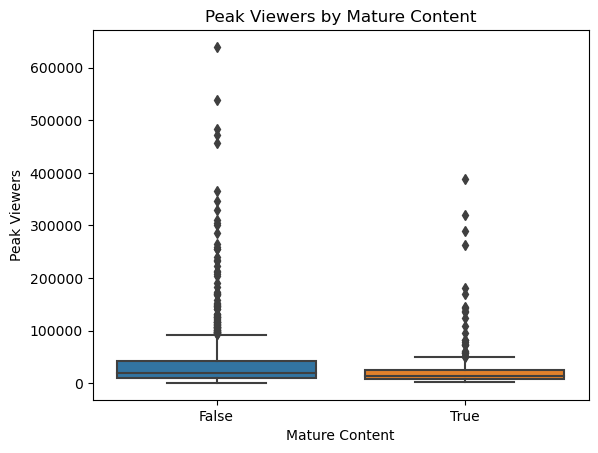

In [15]:
sns.boxplot(data=data, x='Mature', y='Peak viewers')
plt.xlabel('Mature Content')
plt.ylabel('Peak Viewers')
plt.title('Peak Viewers by Mature Content')
plt.show()

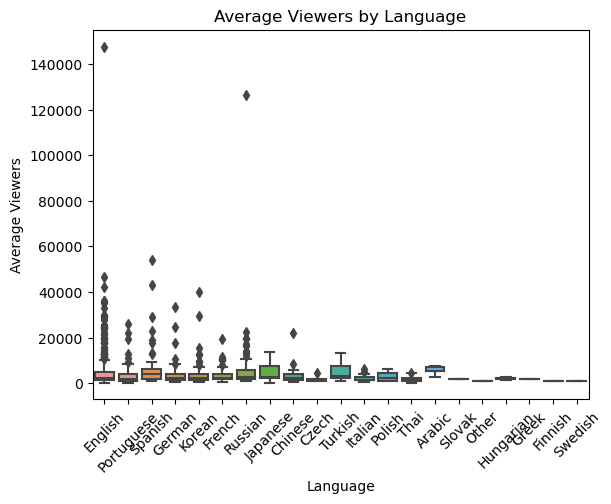

In [16]:
sns.boxplot(data=data, x='Language', y='Average viewers')
plt.xlabel('Language')
plt.ylabel('Average Viewers')
plt.title('Average Viewers by Language')
plt.xticks(rotation=45)
plt.show()

In [17]:
data['Followers to Views Ratio'] = data['Followers gained'] / data['Views gained']
highest_followers_views_ratio = data.nlargest(10, 'Followers to Views Ratio')
print("Channels with the highest followers to views gained ratio:")
print(highest_followers_views_ratio[['Channel', 'Followers to Views Ratio']])

Channels with the highest followers to views gained ratio:
              Channel  Followers to Views Ratio
794           Draineo                  0.373757
547     Flight23white                  0.349336
669          SLAKUN10                  0.321309
995         LITkillah                  0.260251
880        iklooode25                  0.245410
759         FFearFFul                  0.241379
616         ChicaLive                  0.227409
988  CallMeCarsonLIVE                  0.207208
97              NOBRU                  0.206453
825     MarkitoNavaja                  0.203132


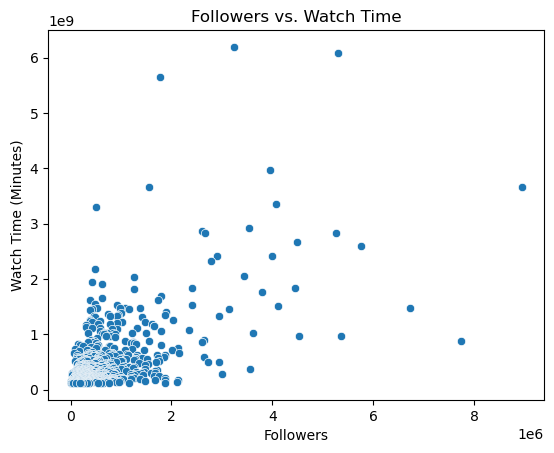

In [18]:
sns.scatterplot(data=data, x='Followers', y='Watch time(Minutes)')
plt.xlabel('Followers')
plt.ylabel('Watch Time (Minutes)')
plt.title('Followers vs. Watch Time')
plt.show()

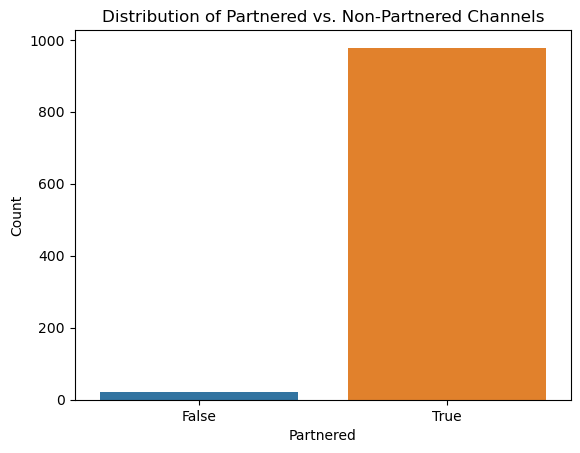

In [19]:
sns.countplot(data=data, x='Partnered')
plt.xlabel('Partnered')
plt.ylabel('Count')
plt.title('Distribution of Partnered vs. Non-Partnered Channels')
plt.show()